# Machine Learning - UFRJ 2022.2
## Clusterização

#### Feito por Rafael da Silva Fernandes, DRE: 117196229

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


from yellowbrick.cluster import KElbowVisualizer

## Base de dados

In [2]:
df = pd.read_csv('data_by_artist_o.csv')
df.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [3]:
df.drop(columns = ["genres", "artists", "key", "mode", "count"], inplace = True)

In [4]:
normalized_values = Normalizer().fit_transform(df.values)

## Funções

- Silhouette: varia entre -1 e 1. Quanto mais próximo de 1, mais compactos e separados estão os clusters. Um valor positivo já é um indicativo de boa criação dos clusters, e isso o torna o índice mais popular e utilizado.

- Daniel Bouldin: quanto mais próximo de 0, melhor, e quanto mais próximo de 1, pior. Seu cálculo sempre pega o pior caso, pois se mesmo assim obtermos um bom resultado, podemos dizer então que temos uma boa clusterização.

- Calinski Harabasz: quanto mais alto, melhor.

In [5]:
SEED = 71122

In [6]:
def clustering_algorithm(algorithm, dataset, n_clusters):

    if algorithm == 'k-means':
        model = KMeans(n_clusters, random_state = SEED)

    elif algorithm == 'agglomerative':
        model = AgglomerativeClustering(n_clusters)

    else:
        return "'Algorithm' parameter should be either 'k-means' or 'agglomerative'"

    labels = model.fit_predict(dataset)

    return model, labels

In [7]:
def eval(algorithm, dataset, n_clusters):

    _, labels = clustering_algorithm(algorithm, dataset, n_clusters)

    silhouette = metrics.silhouette_score(dataset, labels)
    dbs = metrics.davies_bouldin_score(dataset, labels)
    c_h = metrics.calinski_harabasz_score(dataset, labels)

    print(f"Silhouette = {silhouette} | Daniel Bouldin = {dbs} | Calinski-Harabasz = {c_h}")

In [8]:
def loop_clustering(algorithm):

    for n_cluster in range(2, 11):
    
        print(f"\nNúmero de clusters = {n_cluster}")
        eval(algorithm, normalized_values, n_cluster)
        print("=" * 100)

## Aglomeração hierárquica

In [9]:
loop_clustering('agglomerative')


Número de clusters = 2
Silhouette = 0.43320231146059185 | Daniel Bouldin = 0.969469363149803 | Calinski-Harabasz = 15666.376372548182

Número de clusters = 3
Silhouette = 0.38434253029429594 | Daniel Bouldin = 0.9315938371173734 | Calinski-Harabasz = 16522.34052451352

Número de clusters = 4
Silhouette = 0.38850018061596553 | Daniel Bouldin = 0.8462066987138644 | Calinski-Harabasz = 16712.628318697058

Número de clusters = 5
Silhouette = 0.289457292594914 | Daniel Bouldin = 0.9480601609214749 | Calinski-Harabasz = 17554.0599206355

Número de clusters = 6
Silhouette = 0.3211320515598552 | Daniel Bouldin = 0.8463137451632878 | Calinski-Harabasz = 17339.605075091735

Número de clusters = 7
Silhouette = 0.32615922597707564 | Daniel Bouldin = 0.8987140379549295 | Calinski-Harabasz = 16673.615489563912

Número de clusters = 8
Silhouette = 0.32739782810359447 | Daniel Bouldin = 0.9306079982160876 | Calinski-Harabasz = 16026.516577837814

Número de clusters = 9
Silhouette = 0.2978153775032874

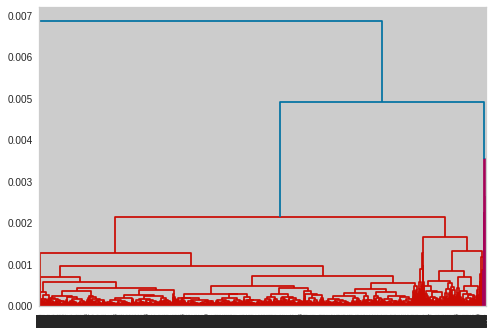

In [10]:
cluster = shc.linkage(normalized_values, method = 'complete', metric = 'euclidean')
plt.figure()
shc.dendrogram(Z = cluster)
plt.show()

## K-Means

In [11]:
loop_clustering('k-means')


Número de clusters = 2
Silhouette = 0.5427013066231212 | Daniel Bouldin = 0.8841398958825567 | Calinski-Harabasz = 17217.121087495107

Número de clusters = 3
Silhouette = 0.413748844724425 | Daniel Bouldin = 0.8749312239548201 | Calinski-Harabasz = 19000.058420552687

Número de clusters = 4
Silhouette = 0.36217675913875647 | Daniel Bouldin = 0.8844116438341707 | Calinski-Harabasz = 19612.474158485078

Número de clusters = 5
Silhouette = 0.36710456989768475 | Daniel Bouldin = 0.8676348303746003 | Calinski-Harabasz = 18801.580661428565

Número de clusters = 6
Silhouette = 0.3633154472871043 | Daniel Bouldin = 0.8508320498568239 | Calinski-Harabasz = 19135.51981718823

Número de clusters = 7
Silhouette = 0.35600089780119876 | Daniel Bouldin = 0.8707599282002088 | Calinski-Harabasz = 19064.263682221826

Número de clusters = 8
Silhouette = 0.35518504214775226 | Daniel Bouldin = 0.8782751864256245 | Calinski-Harabasz = 18657.431192598866

Número de clusters = 9
Silhouette = 0.35016131091408

### Elbow Method

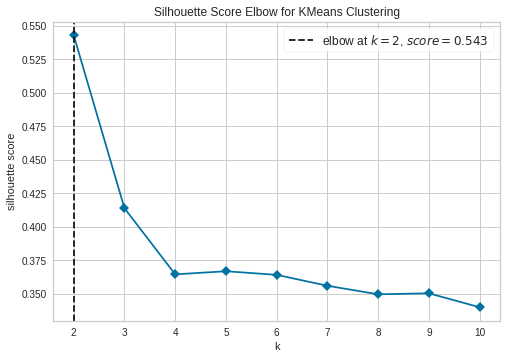

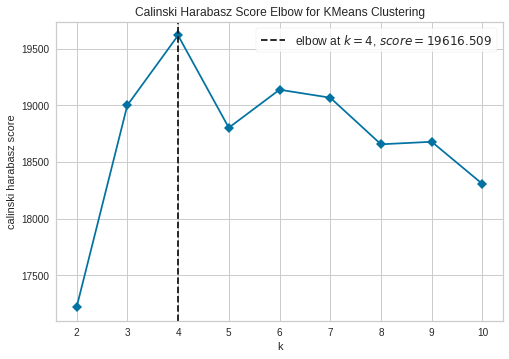

In [12]:
model = KMeans()

metrics = ['silhouette', 'calinski_harabasz']

for metric in metrics:
    visualizer = KElbowVisualizer(model, k = (2, 11), metric = metric, timings = False)
    visualizer.fit(normalized_values)
    visualizer.show()

### Criação dos rótulos (labels) dos clusters
Como temos 4 clusters, os rótulos serão numerados de 0 à 3.

In [13]:
KMEANS_N_CLUSTERS = 4

In [14]:
kmeans = KMeans(KMEANS_N_CLUSTERS, random_state = SEED)
y_pred = kmeans.fit_predict(normalized_values)
labels = kmeans.labels_
np.unique(labels, return_counts = True)

(array([0, 1, 2, 3], dtype=int32), array([13117,   140,  2302, 13121]))

In [15]:
df["cluster"] = labels

### Extraindo informações dos clusters

In [16]:
centroids = kmeans.cluster_centers_
max = len(centroids[0])

for i in range(max):
    print("Coluna: {} - Variância: {}".format(df.columns.values[i], centroids[:, i].var()))

Coluna: acousticness - Variância: 2.3365147629076584e-11
Coluna: danceability - Variância: 1.4905552710489062e-11
Coluna: duration_ms - Variância: 3.683418123338968e-12
Coluna: energy - Variância: 7.174539114529827e-12
Coluna: instrumentalness - Variância: 3.30196466217461e-12
Coluna: liveness - Variância: 6.084806671652328e-12
Coluna: loudness - Variância: 1.4421661743025108e-08
Coluna: speechiness - Variância: 2.505277303305046e-12
Coluna: tempo - Variância: 9.181593510110989e-07
Coluna: valence - Variância: 1.822721323531871e-11
Coluna: popularity - Variância: 1.6814315296765033e-08


In [17]:
description = df.groupby("cluster")[["acousticness", "danceability", "loudness", "tempo", "valence", "popularity"]]
size = description.size()
description = description.mean()
description["size"] = size
description

,acousticness,danceability,loudness,tempo,valence,popularity,size
cluster,,,,,,,
0,0.510046,0.525416,-12.006317,103.915134,0.458360,31.692143,13117
1,0.628432,0.515266,-15.291625,136.833609,0.549497,22.678333,140
2,0.589323,0.537417,-12.209276,138.617686,0.593484,31.465923,2302
3,0.469358,0.569483,-10.043141,123.551581,0.552507,37.005757,13121
